In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')
pi = np.pi
g = 10

In [7]:
def average_value(arr):
    return sum(arr) / len(arr)
def average_fault(arr):
    len_arr = len(arr)
    average_value = sum(arr)/len_arr
    res = 0
    for i in range(len(arr)):
        res+=(arr[i] - average_value)**2
    res = (res/(len_arr * (len_arr - 1)))**0.5
    return res

# data

In [61]:
m1 = 328.5 * 10**(-3)
m2 = 270.5 * 10**(-3)
m3 = 217.4 * 10**(-3)
m4 = 173.9 * 10**(-3)
m5 = 149.9 * 10**(-3)
m_clnd = 1616.6 * 10 ** (-3)
dm = dm = 0.5 * 10**(-3) # гр
r = (7.78 / 2)*10 ** (-2)
dr = 0.1* 10**(-3)

w0 = 2 * pi * 400
l = 121 * 10 **(-3)

data_times = [[30.215, 30.426, 30.583], [37.2, 37.1, 37.1], [46.07, 46.04, 46.1], [57.39, 57.47, 57.38], [70.49, 70.82, 70.6]]

times = [average_value(i) for i in data_times]
times_fault = [average_fault(i) for i in data_times]
mass = [m1, m2, m3, m4, m5]

T_rot = 31.25
T_clnd = 39.4

dT = 0.01

In [22]:
print(times)
print(times_fault)

[30.407999999999998, 37.13333333333333, 46.07, 57.413333333333334, 70.63666666666667]
[0.10661300733650299, 0.03333333333333381, 0.01732050807568943, 0.028480012484390818, 0.09701088140570116]


In [23]:
I_clnd = 0.5 * m_clnd * r**2
I_rot = I_clnd * (T_rot /  T_clnd)**2

dI_clnd_rel = ((dm / m_clnd)**2 + (2 * dr / r)**2)**0.5
dI_rot_rel = ((dI_clnd_rel)**2 + (2 * dT / T_rot)**2 + (2 * dT / T_clnd)**2)**0.5
dI_rot = dI_rot_rel * I_rot

In [24]:
print(I_rot*10000)
print(dI_rot*10000)

7.6944818783477285
0.04012715127346255


In [62]:
theor_const = 2 * pi * I_rot * w0 / (l * g) 
theor_const

10.041850209671809

In [116]:
const = 10.84
const_faults = [((times_fault[i] / times[i])**2 + (dm / mass[i])**2)**0.5 for i in range(len(times))]
const_fault_rel = max(const_faults)
const_fault_rel* 10.84

0.04143280465556851

In [101]:
w0_exp = const * g * l / (2 * pi * I_rot)
w0_exp_fault_rel = ((const_fault_rel)**2 + (dr / l)**2 + (dI_rot_rel)**2)**0.5

print(w0_exp / (2 * pi))
print(w0_exp_fault_rel * w0_exp / (2 * pi))

431.7929375030691
2.8145859595778098


In [38]:
x = [x**(-1) for x in mass]
# x = mass 
y = times

In [43]:
model1 = np.poly1d(np.polyfit(x, y, 1))
# model2 = np.poly1d(np.polyfit(x, y, 2))

 
10.84 x - 3.172
        2
0.6727 x + 4.298 x + 11.54
        3         2
0.5002 x - 6.607 x + 38.24 x - 38.97
        4         3         2
0.1786 x - 2.963 x + 17.92 x - 36.8 x + 44.63


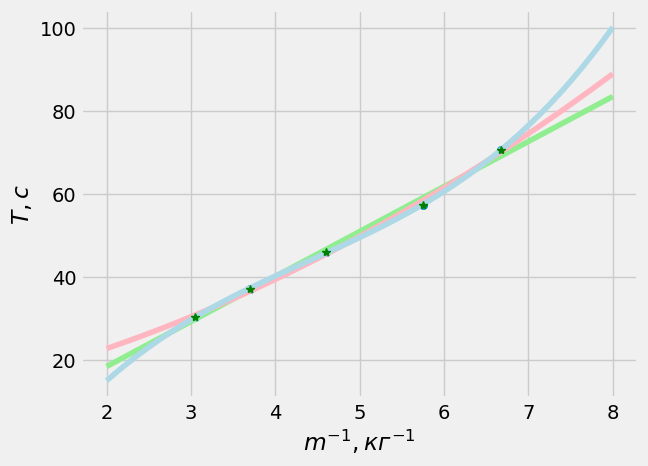

In [105]:
polyline = np.linspace(2, 8)
plt.errorbar(x, y, yerr=times_fault, fmt="*", capsize = 3, color = 'green')
plt.scatter(x, y, label = "k = 10.84")
plt.ylabel(r'$T, c$')
plt.xlabel(r'$m^{-1}, кг^{-1}$')

plt.plot(polyline, model1(polyline), color = 'lightgreen', label = '$n = 1$')
plt.plot(polyline, model2(polyline), color = 'lightpink', label = '$n = 2$')
plt.plot(polyline, model3(polyline), color = 'lightblue')
# plt.plot(polyline, model4(polyline), color = 'lightskyblue')
print(model1)
print(model2)
print(model3)
print(model4)
plt.show()

In [87]:
def adjR(x, y, degree):
    results = {}
    coeffs = np.polyfit(x, y, degree)
    p = np.poly1d(coeffs)
    yhat = p(x)
    ybar = np.sum(y)/len(y)
    ssreg = np.sum((yhat-ybar)**2)
    sstot = np.sum((y - ybar)**2)
    results['r_squared'] = 1- (((1-(ssreg/sstot))*(len(y)-1))/(len(y)-degree-1))

    return results

#calculated adjusted R-squared of each model
print(adjR(x , y , 1))
print(adjR(x , y , 2))
print(adjR(x , y , 3))

{'r_squared': 0.9921598705686914}
{'r_squared': 0.9958179505752922}
{'r_squared': 0.9994044397742496}


# data friction

In [106]:
a = 12 * pi / 180
times_friction = [62.03, 61.84, 61.9]
time_friction = average_value(times_friction)
time_friction_fault = average_fault(times_friction)
da = 2 * pi / 180

w_friction = a / time_friction
w_friction_fault = w_friction * (((time_friction_fault / time_friction)**2 + (da / a)**2)**0.5)

In [108]:
print(time_friction)
print(time_friction_fault)
print(w_friction*1000)
print(w_friction_fault*1000)

61.92333333333334
0.056075346137535356
3.382238955256277
0.563714813199531


In [112]:
M_friction = I_rot * w0_exp * w_friction
M_friction_fault_rel = ((w_friction_fault / w_friction)**2 + (dI_rot_rel)**2 + (w0_exp_fault_rel)**2)**0.5

In [115]:
print(M_friction*1000)
print(M_friction_fault_rel * M_friction*1000)

7.0605587554502875
1.1782522811297884
